In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mglearn
import matplotlib
import platform
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':  # Mac
    matplotlib.rc('font', family='AppleGothic')
else:
    matplotlib.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐방지

## 검색범위가 적절하게 선택되지 않아서 바람직하지 못한 결과를 낳는 경우

In [2]:
np.array(np.arange(36)) #0~35 1차원

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35])

In [3]:
np.array(np.arange(36)).reshape(6,6)

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35]])

[[0.94664032 0.94664032 0.94664032 0.94664032 0.94664032 0.95533597]
 [0.95533597 0.94664032 0.94664032 0.94664032 0.94664032 0.95533597]
 [0.95533597 0.95533597 0.94664032 0.94664032 0.94664032 0.94664032]
 [0.95533597 0.95533597 0.95533597 0.94664032 0.94664032 0.94664032]
 [0.95533597 0.95533597 0.95533597 0.94664032 0.94664032 0.94664032]
 [0.95533597 0.95533597 0.95533597 0.94664032 0.94664032 0.94664032]]
[[0.69644269 0.93794466 0.96403162 0.94664032 0.9284585  0.50158103]
 [0.69644269 0.93794466 0.96403162 0.95533597 0.91976285 0.58142292]
 [0.69644269 0.93794466 0.96403162 0.95533597 0.91976285 0.58142292]
 [0.69644269 0.94664032 0.96403162 0.95533597 0.91106719 0.58142292]
 [0.69644269 0.94664032 0.96403162 0.95533597 0.91106719 0.58142292]
 [0.69644269 0.94664032 0.96403162 0.95533597 0.91106719 0.58142292]]
[[0.36640316 0.36640316 0.36640316 0.36640316 0.36640316 0.36640316]
 [0.36640316 0.36640316 0.36640316 0.36640316 0.36640316 0.36640316]
 [0.36640316 0.36640316 0.366403

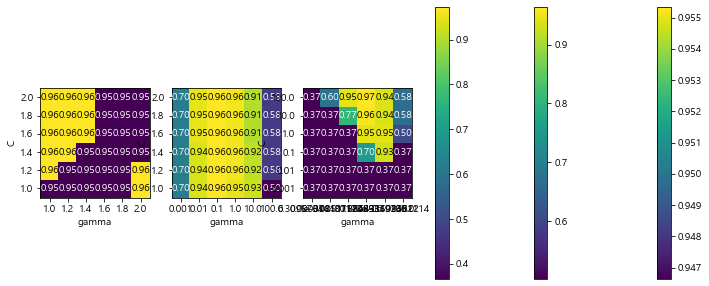

In [4]:
fig, axes=plt.subplots(1,3,figsize=(13,5))
param_grid_linear={'C':np.linspace(1,2,6),'gamma':np.linspace(1,2,6)} 
#linspace: 1부터 2 사이에 6개
param_grid_one_log={'C':np.linspace(1,2,6),'gamma':np.logspace(-3,2,6)}
param_grid_range={"C":np.logspace(-3,2,6),'gamma':np.logspace(-7,2,6)}

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris=load_iris()
X_train,X_test,y_train,y_test=train_test_split(iris.data, iris.target,random_state=0)
for param_grid, ax in zip([param_grid_linear, param_grid_one_log, param_grid_range],axes):
    grid_search=GridSearchCV(SVC(),param_grid,cv=5)
    grid_search.fit(X_train,y_train)
    scores=grid_search.cv_results_['mean_test_score'].reshape(6,6)
    scores_image=mglearn.tools.heatmap(
    scores,xlabel='gamma',ylabel='C',xticklabels=param_grid['gamma'],yticklabels=param_grid['C'],
        cmap='viridis',ax=ax
    )
    print(scores)

    plt.colorbar(scores_image,ax=axes.tolist())
    plt.show
    

In [5]:
np.logspace(-3,2,6)

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

## 비대칭 매개변수 그리드 탐색

In [6]:
param_grid=[{'kernel':['rdf'],'C':[0.001,0.01,0.1,1,10,100],'gamma':[0.001,0.01,0.1,1,10,100]},
           {'kernel':['linear'],'C':[0.001,0.01,0.1,1,10,100]}]
print('그리드 목록:',param_grid)

그리드 목록: [{'kernel': ['rdf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [8]:
grid_search=GridSearchCV(SVC(),param_grid,cv=5,return_train_score=True)
grid_search.fit(X_train,y_train)
print('best parameter:',grid_search.best_params_)
print(grid_search.best_score_)

best parameter: {'C': 1, 'kernel': 'linear'}
0.9731225296442687


In [11]:
results=pd.DataFrame(grid_search.cv_results_)
display(results.T)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.000399017,0.000199461,0.000199461,0.000199509,0.00039897,0.000199461,0.00019989,0.000397635,0.000399017,0,...,0.000204992,0.000199556,0.00019989,0.000199652,0.000399065,0.000598621,0,0,0,0.000399494
std_fit_time,0.000488695,0.000398922,0.000398922,0.000399017,0.000488636,0.000398922,0.00039978,0.000487006,0.000488695,0,...,0.000409985,0.000399113,0.00039978,0.000399303,0.000488753,0.000489082,0,0,0,0.00048928
mean_score_time,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.000199366,0.000398874,0,0,0.000587559,0.00060401
std_score_time,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.000398731,0.000488519,0,0,0.00047988,0.000493583
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,...,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rdf,rdf,rdf,rdf,rdf,rdf,rdf,rdf,rdf,rdf,...,rdf,rdf,rdf,rdf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rdf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rdf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rdf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rdf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rdf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rdf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rdf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rdf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rdf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rdf'}",...,"{'C': 100, 'gamma': 0.1, 'kernel': 'rdf'}","{'C': 100, 'gamma': 1, 'kernel': 'rdf'}","{'C': 100, 'gamma': 10, 'kernel': 'rdf'}","{'C': 100, 'gamma': 100, 'kernel': 'rdf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.347826,0.869565,1,1,1,0.956522
split1_test_score,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.347826,0.869565,0.913043,0.956522,1,0.956522


## 중첩 교차 검증

In [12]:
from sklearn.model_selection import cross_val_score
param_grid={'C':[0.001,0.01,0.1,1,10,100],'gamma':[0.001,0.01,0.1,1,10,100]}
scores=cross_val_score(GridSearchCV(SVC(),param_grid,cv=5),iris.data,iris.target,cv=5)

In [13]:
print(scores)

[0.96666667 1.         0.96666667 0.96666667 1.        ]


In [14]:
print(scores.mean())

0.9800000000000001


## 불균형 데이터 셋

In [21]:
from sklearn.datasets import load_digits
digits=load_digits()
y=digits.target ==9

In [22]:
y

array([False, False, False, ..., False,  True, False])

In [23]:
X_train,X_test,y_train,y_test=train_test_split(digits.data,y,random_state=0)


In [29]:
from sklearn.dummy import DummyClassifier
dummy_majority=DummyClassifier(strategy='most_frequent').fit(X_train,y_train)
pred_most_frequent=dummy_majority.predict(X_test)
print(np.unique(pred_most_frequent))
print(dummy_majority.score(X_test, y_test))

[False]
0.8955555555555555


In [31]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(max_depth=2).fit(X_train,y_train)
pred_tree=tree.predict(X_test)
print(tree.score(X_test,y_test))

0.9177777777777778


In [32]:
from sklearn.linear_model import LogisticRegression
dummy=DummyClassifier().fit(X_train,y_train)
pred_dummy=dummy.predict(X_test)
print(dummy.score(X_test,y_test))

0.8311111111111111


In [33]:
logerg=LogisticRegression(C=0.1).fit(X_train,y_train)
pred_logerg=logerg.predict(X_test)
print(logerg.score(X_test,y_test))

0.9844444444444445


In [27]:
#f1 score
from sklearn.metrics import f1_score
print(f1_score(y_test,pred_most_frequent))

0.0


In [34]:
#classificartion_report
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_most_frequent,target_names=['9 아님','9']))

              precision    recall  f1-score   support

        9 아님       0.90      1.00      0.94       403
           9       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



In [35]:
print(classification_report(y_test,pred_dummy,target_names=['9 아님','9']))

              precision    recall  f1-score   support

        9 아님       0.89      0.88      0.88       403
           9       0.07      0.09      0.08        47

    accuracy                           0.79       450
   macro avg       0.48      0.48      0.48       450
weighted avg       0.81      0.79      0.80       450



In [36]:
print(classification_report(y_test,pred_logerg,target_names=['9 아님','9']))

              precision    recall  f1-score   support

        9 아님       0.99      1.00      0.99       403
           9       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



In [38]:
#다중 분류
from sklearn.metrics import accuracy_score

In [40]:
X_train, X_test, y_train,y_test=train_test_split(
digits.data,digits.target, random_state=0)

In [41]:
lr=LogisticRegression(solver='liblinear',multi_class='ovr').fit(X_train,y_train)

In [43]:
pred=lr.predict(X_test)

In [48]:
from sklearn.metrics import confusion_matrix
print('정확도:',accuracy_score(y_test,pred))
print('오차행렬:',confusion_matrix(y_test,pred))

정확도: 0.9533333333333334
오차행렬: [[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


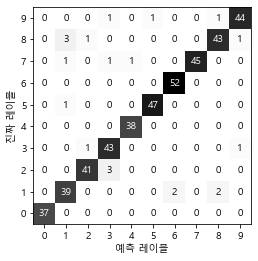

In [50]:
score_image=mglearn.tools.heatmap(
confusion_matrix(y_test,pred),xlabel='예측 레이블',
    ylabel='진짜 레이블',xticklabels=digits.target_names,yticklabels=digits.target_names,
cmap=plt.cm.gray_r,fmt='%d')

In [51]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.91      0.90        43
           2       0.95      0.93      0.94        44
           3       0.90      0.96      0.92        45
           4       0.97      1.00      0.99        38
           5       0.98      0.98      0.98        48
           6       0.96      1.00      0.98        52
           7       1.00      0.94      0.97        48
           8       0.93      0.90      0.91        48
           9       0.96      0.94      0.95        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [52]:
#회귀 평가

In [55]:
print('기본 평가 지표:',cross_val_score(SVC(),digits.data,digits.target==9,cv=5))

기본 평가 지표: [0.975      0.99166667 1.         0.99442897 0.98050139]


In [57]:
explicit_accuracy=cross_val_score(SVC(),digits.data,digits.target,scoring='accuracy',cv=5)
explicit_accuracy

array([0.96111111, 0.94444444, 0.98328691, 0.98885794, 0.93871866])

In [60]:
roc_auc=cross_val_score(SVC(),digits.data,digits.target==9,scoring='roc_auc',cv=5)
roc_auc

array([0.99717078, 0.99854252, 1.        , 0.999828  , 0.98400413])

In [63]:
from sklearn.model_selection import cross_validate
res=cross_validate(SVC(),digits.data,digits.target==9,
                  scoring=['accuracy','roc_auc','recall_macro'],return_train_score=True,cv=5)
res

{'fit_time': array([0.01997423, 0.02290821, 0.01994681, 0.01994658, 0.0199461 ]),
 'score_time': array([0.00897574, 0.00897574, 0.00997353, 0.00997424, 0.00897598]),
 'test_accuracy': array([0.975     , 0.99166667, 1.        , 0.99442897, 0.98050139]),
 'train_accuracy': array([0.99443285, 0.99582463, 0.99513213, 0.99582754, 0.99652295]),
 'test_roc_auc': array([0.99717078, 0.99854252, 1.        , 0.999828  , 0.98400413]),
 'train_roc_auc': array([0.99867878, 0.99914067, 0.99897497, 0.9988247 , 0.99991413]),
 'test_recall_macro': array([0.88734568, 0.95833333, 1.        , 0.97222222, 0.90277778]),
 'train_recall_macro': array([0.97222222, 0.98225219, 0.97878027, 0.98225249, 0.98572471])}

In [64]:
display(pd.DataFrame(res))

,fit_time,score_time,test_accuracy,train_accuracy,test_roc_auc,train_roc_auc,test_recall_macro,train_recall_macro
0,0.019974,0.008976,0.975000,0.994433,0.997171,0.998679,0.887346,0.972222
1,0.022908,0.008976,0.991667,0.995825,0.998543,0.999141,0.958333,0.982252
2,0.019947,0.009974,1.000000,0.995132,1.000000,0.998975,1.000000,0.978780
3,0.019947,0.009974,0.994429,0.995828,0.999828,0.998825,0.972222,0.982252
4,0.019946,0.008976,0.980501,0.996523,0.984004,0.999914,0.902778,0.985725


In [71]:
X_train,X_test,y_train,y_test=train_test_split(digits.data,digits.target==9,random_state=0)

In [72]:
param_grid={'gamma':[0.001,0.01,0.1,1,10]}
grid=GridSearchCV(SVC(),param_grid)
grid.fit(X_train,y_train)
print('best parameter?:',grid.best_params_)

best parameter?: {'gamma': 0.001}


In [73]:
print('최상의 교차 검증 점수:',grid.best_score_)

최상의 교차 검증 점수: 0.996288035247143


In [76]:
from sklearn.metrics import average_precision_score
print(average_precision_score(y_test,grid.decision_function(X_test)))

0.996851803805767


In [78]:
print(accuracy_score(y_test,grid.predict(X_test)))

0.9911111111111112


In [79]:
from sklearn.metrics.scorer import SCORERS

In [81]:
sorted(SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

아직까지는 tensorflow 1이 회사에서 많이 쓰이긴 함

In [82]:
#알고리즘 체인과 파이프라인

In [86]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [89]:
cancer=load_breast_cancer()

In [91]:
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=0)

In [92]:
scaler=MinMaxScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
svm=SVC()
svm.fit(X_train_scaled,y_train)

In [95]:
X_test_scaled=scaler.transform(X_test)

In [97]:
X_test[0]

array([1.340e+01, 2.052e+01, 8.864e+01, 5.567e+02, 1.106e-01, 1.469e-01,
       1.445e-01, 8.172e-02, 2.116e-01, 7.325e-02, 3.906e-01, 9.306e-01,
       3.093e+00, 3.367e+01, 5.414e-03, 2.265e-02, 3.452e-02, 1.334e-02,
       1.705e-02, 4.005e-03, 1.641e+01, 2.966e+01, 1.133e+02, 8.444e+02,
       1.574e-01, 3.856e-01, 5.106e-01, 2.051e-01, 3.585e-01, 1.109e-01])

In [98]:
X_test_scaled[0]

array([0.30380046, 0.44854772, 0.30993021, 0.17527041, 0.62962963,
       0.43668242, 0.33856607, 0.40616302, 0.53333333, 0.49052233,
       0.10106826, 0.12555836, 0.11006926, 0.04942689, 0.17120785,
       0.1958559 , 0.08717172, 0.25269937, 0.17111501, 0.10745132,
       0.301672  , 0.47014925, 0.31321281, 0.16201337, 0.56943802,
       0.34763416, 0.40782748, 0.70651051, 0.39818648, 0.36639118])

In [100]:
print('테이스 점수:',svm.score(X_test_scaled,y_test))

테이스 점수: 0.972027972027972


In [111]:
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.001,0.01,1,10,100],'gamma':[0.001,0.01,1,10,100]}
grid=GridSearchCV(SVC(),param_grid=param_grid,cv=5)
grid.fit(X_train_scaled,y_train)
print('최고의 검증 정확도',grid.best_score_)
print('테스트 점수',grid.score(X_test_scaled,y_test))
print('최고의 매개변수',grid.best_params_)

최고의 검증 정확도 0.9812311901504789
테스트 점수 0.972027972027972
최고의 매개변수 {'C': 1, 'gamma': 1}


In [113]:
#앞에서 했던 과정을 파이프라인을 통해 줄일 수 있다.
from sklearn.pipeline import Pipeline
pipe=Pipeline([('scaler',MinMaxScaler()),('svm',SVC())])
pipe.fit(X_train,y_train)
print(pipe.score(X_test,y_test))

0.972027972027972


In [ ]:
#비교. 완전 간단해짐
scaler=MinMaxScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
svm=SVC()
svm.fit(X_train_scaled,y_train)